In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#!pip install librosa
import librosa
import librosa.display
import librosa.feature

/Users/tanjazast/Desktop/InstrumentalClustering/dataset/IRMAS-Sample/Training/sax/118__[sax][nod][jaz_blu]1702__3.wav
/Users/tanjazast/Desktop/InstrumentalClustering/dataset/IRMAS-Sample/Training/vio/001__[vio][nod][cou_fol]2194__1.wav
/Users/tanjazast/Desktop/InstrumentalClustering/dataset/IRMAS-Sample/Training/vio/134__[vio][nod][cla]2156__3.wav


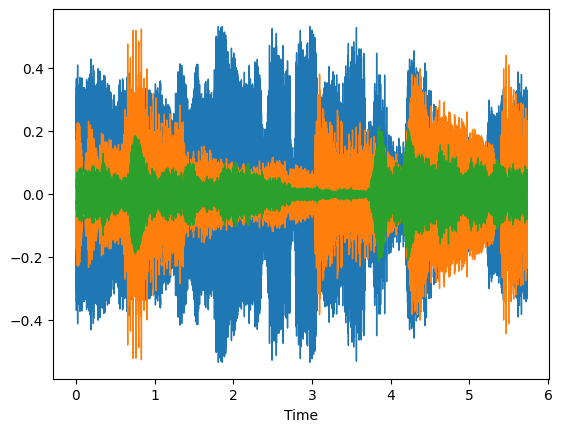

In [37]:
pathAudio = "/Users/tanjazast/Desktop/InstrumentalClustering/dataset/IRMAS-Sample/Training"
files = librosa.util.find_files(pathAudio, ext=['wav']) 
files = np.asarray(files)
for y in files: 
    data = librosa.load(y, sr = 42100,mono = True)   
    data = data[0]     
    librosa.display.waveshow(data)
    print(y)

In [30]:
import wave

# Öffnen der WAV-Datei im Lesemodus
with wave.open('/Users/tanjazast/Desktop/InstrumentalClustering/dataset/IRMAS-Sample/Training/sax/118__[sax][nod][jaz_blu]1702__3.wav', 'r') as wav_file:
    
    # Ausgabe der Anzahl der Kanäle, der Samplingrate und der Anzahl der Frames
    print('Anzahl der Kanäle:', wav_file.getnchannels())
    print('Samplingrate:', wav_file.getframerate())
    print('Anzahl der Frames:', wav_file.getnframes())
    
    # Lesen der Audiodaten
    frames = wav_file.readframes(-1)
    
    # Konvertierung der Rohdaten in ein Array von Abtastwerten
    data = list(frames)

Anzahl der Kanäle: 2
Samplingrate: 44100
Anzahl der Frames: 132299


In [5]:
pathAudio = "/Users/tanjazast/Desktop/InstrumentalClustering/dataset/IRMAS-TrainingData/cel"
files = librosa.util.find_files(pathAudio, ext=['wav']) 
files = np.asarray(files)
for y in files: 
    data = librosa.load(y, sr = 42100,mono = True)   
    data = data[0]     
    librosa.display.waveshow(data)
    #print(y)

In [30]:
import os
import numpy as np

folder_path = "/Users/tanjazast/Desktop/InstrumentalClustering/InstrumentalClustering/dataset/IRMAS-TestingData-Part2/IRTestingData-Part2"
folder_name = ["cel", "cla", "flu", "gac", "gel", "org", "pia", "sax", "tru", "vio", "voi"]
y_additional = []

for filename in sorted(os.listdir(folder_path)):
    if filename.endswith(".txt"):
        row = np.zeros(len(folder_name))
        with open(folder_path+"/"+filename, "r") as f:
            for i in f:
                #print(i.strip())
                for j in folder_name:
                    #print(filename,j,i.strip())
                    if i.strip() == j:
                        row[folder_name.index(j)] = 1
        y_additional.append(row)

print((np.array(y_additional)).shape)

(1301, 11)


In [23]:
np.save('y_additional.npy', y_additional)

In [31]:
Y_train = np.load('/Users/tanjazast/Desktop/InstrumentalClustering/InstrumentalClustering/InstrumentalClustering/train.npy/y_train.npy')
Y_test = np.load('/Users/tanjazast/Desktop/InstrumentalClustering/InstrumentalClustering/InstrumentalClustering/test.npy/Y_Test.npy')
Y_additional = np.load('/Users/tanjazast/Desktop/InstrumentalClustering/InstrumentalClustering/InstrumentalClustering/Notebooks/y_additional.npy')

In [25]:
Y = np.concatenate((Y_train, Y_test, Y_additional))
print(Y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [26]:
Y.shape

(2339, 11)

In [27]:
count = []
for i in range(0, 11):
    column = Y[:,i]
    count.append(np.count_nonzero(column == 1))
print(count)

[66, 64, 124, 443, 733, 291, 873, 297, 143, 219, 737]


In [28]:
a = np.load('/Users/tanjazast/Desktop/InstrumentalClustering/InstrumentalClustering/InstrumentalClustering/test.npy/Y_Test.npy')

In [29]:
a.shape

(766, 11)